# Telecom Churn Case Study 

# Business Goal 

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

	 1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
	2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.



### Steps 

	1. Data Preposseing & Feature Engineering  
         * Missing Value Treatment 
         * Conduct appropriate exploratory analysis to extract useful insights (whether directly useful 
               for business or for eventual modelling/feature engineering).
         * Derive new features.
         *  Filter high-value customers
             - Those who have recharged with an amount more than or equal  70th percentile of the average recharge amount in the first two months .   
         *  Tag churners and remove attributes of the churn phase
            Now tag the churned customers (churn=1, else 0) based on the fourth month .
         * Skew and Outlier analysis  
         * Test- Train Split 
	     *  Feature Selection
         
   	2. Model Training and Tuning 
         *  Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).
         
	3. Model Evaluation 
        *  Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which  reflects this business goal.
        *  choose a model based on some evaluation metric.


In [155]:

# Importing the libraries 
import pandas as pd
import numpy as np

#importing libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing library for scalling 
from sklearn.preprocessing import StandardScaler

# importing the library for PCA 
from sklearn.decomposition import PCA

#importing library to split the data 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# importing iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import r2_score

# importing library for model preparation
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables


# from google.colab import drive
# drive.mount('/content/drive')

# importing library for smoth to handle imbalancing 
from imblearn.over_sampling import SMOTE 

# Decision Tree With No PCA 
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz


import warnings
warnings.filterwarnings('ignore')


pd.options.display.max_columns = 150
pd.options.display.max_rows = 100

import os
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Reading the Dataset 
telecom_df=pd.read_csv('telecom_churn_data.csv')

In [11]:
# Analysing the Data 
telecom_df.shape

(99999, 226)

In [12]:
telecom_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

##   Step1 : Data Preprosessing and Feature Engineering 



###  Data preparation

#### Removing unnessary fearures 
 

In [13]:
# Check data types of the variables 
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [14]:
telecom_df[telecom_df.columns[telecom_df.columns.str.contains('last_date_of')]].head()


last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  
0            9/30/2014  
1            9/30/2014  
2            9/30/2014  
3            9/30/2014  
4            9/30/2014

In [15]:
# removing these columns as thet donot contain any meaningful data 
telecom_df=telecom_df[telecom_df.columns[~telecom_df.columns.str.contains('last_date_of')]]

In [16]:
telecom_df.shape

(99999, 222)

### Missing Value Treatment 

In [17]:
# Checking the % of missing Value in columns - Top20 
round((telecom_df.isnull().sum()/len(telecom_df) * 100),2).sort_values(ascending=False).head(20)

arpu_3g_6                   74.85
max_rech_data_6             74.85
av_rech_amt_data_6          74.85
night_pck_user_6            74.85
count_rech_3g_6             74.85
total_rech_data_6           74.85
fb_user_6                   74.85
arpu_2g_6                   74.85
count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
arpu_2g_7                   74.43
arpu_3g_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
dtype: float64

In [18]:
""" 
    * There are 10 Columns with 6 suffix (old) data that have 3/4th of missing values 
    * Lets analyse the missing values 
"""
df_6=telecom_df[telecom_df.columns[telecom_df.columns.str.contains('6')]]
df_6 = df_6.reindex(sorted(df_6.columns), axis=1)
df_6[df_6.isnull().any(axis=1)].head(10)
#df_6[df_6.arpu_3g_6.isnull()].head(10)

arpu_2g_6  arpu_3g_6    arpu_6  av_rech_amt_data_6  count_rech_2g_6  \
0      212.17     212.17   197.385               252.0              0.0   
1         NaN        NaN    34.047                 NaN              NaN   
2         NaN        NaN   167.690                 NaN              NaN   
3         NaN        NaN   221.338                 NaN              NaN   
5         NaN        NaN    50.258                 NaN              NaN   
6         NaN        NaN   429.023                 NaN              NaN   
7         NaN        NaN  1069.180                 NaN              NaN   
8         NaN        NaN   378.721                 NaN              NaN   
9         NaN        NaN   119.518                 NaN              NaN   
10        NaN        NaN     0.400                 NaN              NaN   

    count_rech_3g_6 date_of_last_rech_6 date_of_last_rech_data_6  fb_user_6  \
0               1.0           6/21/2014                6/21/2014        1.0   
1               NaN           6/29/2014                      NaN        NaN   
2               NaN           6/17/2014                      NaN        NaN   
3               NaN           6/28/2014                      NaN        NaN   
5               NaN           6/19/2014                      NaN        NaN   
6               NaN           6/28/2014                      NaN        NaN   
7               NaN           6/27/2014                      NaN        NaN   
8               NaN           6/25/2014                      NaN        NaN   
9               NaN           6/29/2014                      NaN        NaN   
10              NaN           6/14/2014                      NaN        NaN   

    ic_others_6  isd_ic_mou_6  isd_og_mou_6  last_day_rch_amt_6  loc_ic_mou_6  \
0           NaN           NaN           NaN                 252           NaN   
1          0.00          1.83           0.0                  44         19.09   
2          0.93          0.00           0.0                   0        229.56   
3          0.00          0.00           0.0                  30        233.48   
5          0.00          0.00           0.0                 120         77.93   
6          0.11          0.00           0.0                  37       2126.89   
7         15.74          2.06           0.0                   0        427.88   
8          0.00          0.00           0.0                  50         81.43   
9          0.00          8.11           0.0                 110        262.69   
10         0.00          0.00           0.0                   0         26.35   

    loc_ic_t2f_mou_6  loc_ic_t2m_mou_6  loc_ic_t2t_mou_6  loc_og_mou_6  \
0                NaN               NaN               NaN           NaN   
1               0.00             17.48              1.61         35.39   
2              99.48             14.38            115.69         60.66   
3              57.43            113.96             62.08        183.03   
5               0.00             49.19             28.73         66.56   
6              20.24            248.64           1857.99        333.64   
7             152.16            217.56             58.14        422.16   
8               0.00             57.58             23.84        378.09   
9               0.40            132.94            129.34         71.93   
10              0.00             26.35              0.00          0.13   

    loc_og_t2c_mou_6  loc_og_t2f_mou_6  loc_og_t2m_mou_6  loc_og_t2t_mou_6  \
0                NaN               NaN               NaN               NaN   
1               0.00              0.00             11.51             23.88   
2               0.00             24.11             29.34              7.19   
3               0.00              1.91            107.43             73.68   
5               0.00              0.00             16.39             50.16   
6               0.11             10.38            252.23             71.03   
7               0.00             62.13            308.6

In [19]:
# Lets try to find any pattern in not null data for these columns 
df_6[~df_6.isnull().any(axis=1)].head(10)

arpu_2g_6  arpu_3g_6   arpu_6  av_rech_amt_data_6  count_rech_2g_6  \
4        0.00       0.00  261.636                56.0              1.0   
19       3.01       0.00  163.430               154.0              1.0   
32       7.90       0.00   60.651                64.0              3.0   
33     931.58     897.60  977.020              1057.0              0.0   
39      -0.04       0.00  134.945               154.0              1.0   
44       0.00      16.67  226.063               154.0              1.0   
47       0.00       2.72   31.180               274.0              1.0   
52       0.00       0.00  167.881               198.0              1.0   
53      12.00       0.00  978.077                86.0              4.0   
55       0.10       0.00   29.241                14.0              1.0   

    count_rech_3g_6 date_of_last_rech_6 date_of_last_rech_data_6  fb_user_6  \
4               0.0           6/26/2014                 6/4/2014        0.0   
19              0.0           6/27/2014                6/27/2014        1.0   
32              0.0           6/27/2014                6/27/2014        1.0   
33              5.0           6/30/2014                6/30/2014        1.0   
39              0.0           6/14/2014                 6/6/2014        1.0   
44              0.0           6/17/2014                 6/2/2014        1.0   
47              0.0           6/17/2014                6/12/2014        1.0   
52              0.0           6/19/2014                6/19/2014        1.0   
53              0.0           6/29/2014                6/29/2014        1.0   
55              0.0           6/17/2014                 6/5/2014        1.0   

    ic_others_6  isd_ic_mou_6  isd_og_mou_6  last_day_rch_amt_6  loc_ic_mou_6  \
4          0.48          0.00          0.00                  50        214.03   
19         0.00          0.00          0.00                 154         33.19   
32         0.00          0.00          0.00                  25         14.44   
33         1.23          0.00          0.00                 252          3.48   
39         9.74          8.05          0.00                   0          8.71   
44         0.00          0.00          0.00                  30        105.29   
47         0.00          0.00          0.00                   0        145.23   
52         0.00          0.00          0.00                 198          7.20   
53         0.00          0.53        221.19                   0        592.09   
55         0.00         12.86          0.00                   0         49.84   

    loc_ic_t2f_mou_6  loc_ic_t2m_mou_6  loc_ic_t2t_mou_6  loc_og_mou_6  \
4               1.50            106.84            105.68        117.96   
19              0.33             23.73              9.13          4.56   
32              0.00              6.46              7.98         10.90   
33              1.73              0.00              1.75          0.00   
39              0.00              8.11              0.60          0.00   
44              6.56             72.93             25.79        103.83   
47             74.36             68.21              2.65         25.88   
52              0.00              0.00              7.20         41.70   
53              0.43            224.96            366.69        357.03   
55              0.51             45.21              4.11         15.28   

    loc_og_t2c_mou_6  loc_og_t2f_mou_6  loc_og_t2m_mou_6  loc_og_t2t_mou_6  \
4               0.00              0.00             67.64             50.31   
19              0.00              0.00              0.51              4.04   
32              0.00              0.00             10.90              0.00   
33              0.00              0.00              0.00              0.00   
39              0.00              0.00              0.00              0.00   
44             11.91              0.00             45.28             58.54   
47              0.00              0.76             23.19          

In [20]:
# Lets Try to understand 2g for 6 mothns 
df_6_2g=df_6[df_6.columns[df_6.columns.str.contains('2g') | df_6.columns.str.contains('dat') ]]
df_6_2g= df_6_2g.reindex(sorted(df_6_2g.columns), axis=1)


In [21]:
df_6_2g[df_6_2g.isnull().any(axis=1)].head(10)

arpu_2g_6  av_rech_amt_data_6  count_rech_2g_6 date_of_last_rech_6  \
1         NaN                 NaN              NaN           6/29/2014   
2         NaN                 NaN              NaN           6/17/2014   
3         NaN                 NaN              NaN           6/28/2014   
5         NaN                 NaN              NaN           6/19/2014   
6         NaN                 NaN              NaN           6/28/2014   
7         NaN                 NaN              NaN           6/27/2014   
8         NaN                 NaN              NaN           6/25/2014   
9         NaN                 NaN              NaN           6/29/2014   
10        NaN                 NaN              NaN           6/14/2014   
11        NaN                 NaN              NaN           6/18/2014   

   date_of_last_rech_data_6  max_rech_data_6  monthly_2g_6  sachet_2g_6  \
1                       NaN              NaN             0            0   
2                       NaN              NaN             0            0   
3                       NaN              NaN             0            0   
5                       NaN              NaN             0            0   
6                       NaN              NaN             0            0   
7                       NaN              NaN             0            0   
8                       NaN              NaN             0            0   
9                       NaN              NaN             0            0   
10                      NaN              NaN             0            0   
11                      NaN              NaN             0            0   

    total_rech_data_6  vol_2g_mb_6  
1                 NaN          0.0  
2                 NaN          0.0  
3                 NaN          0.0  
5                 NaN          0.0  
6                 NaN          0.0  
7                 NaN          0.0  
8                 NaN          0.0  
9                 NaN          0.0  
10                NaN          0.0  
11                NaN          0.0

In [22]:
df_6_2g[~df_6_2g.isnull().any(axis=1)].head(10)

arpu_2g_6  av_rech_amt_data_6  count_rech_2g_6 date_of_last_rech_6  \
0      212.17               252.0              0.0           6/21/2014   
4        0.00                56.0              1.0           6/26/2014   
19       3.01               154.0              1.0           6/27/2014   
32       7.90                64.0              3.0           6/27/2014   
33     931.58              1057.0              0.0           6/30/2014   
39      -0.04               154.0              1.0           6/14/2014   
44       0.00               154.0              1.0           6/17/2014   
47       0.00               274.0              1.0           6/17/2014   
52       0.00               198.0              1.0           6/19/2014   
53      12.00                86.0              4.0           6/29/2014   

   date_of_last_rech_data_6  max_rech_data_6  monthly_2g_6  sachet_2g_6  \
0                 6/21/2014            252.0             0            0   
4                  6/4/2014             56.0             0            1   
19                6/27/2014            154.0             1            0   
32                6/27/2014             25.0             0            3   
33                6/30/2014            252.0             0            0   
39                 6/6/2014            154.0             1            0   
44                 6/2/2014            154.0             1            0   
47                6/12/2014            274.0             1            0   
52                6/19/2014            198.0             1            0   
53                6/29/2014             23.0             0            4   

    total_rech_data_6  vol_2g_mb_6  
0                 1.0        30.13  
4                 1.0         0.00  
19                1.0       514.81  
32                3.0        76.39  
33                5.0        87.05  
39                1.0       131.44  
44                1.0        20.82  
47                1.0        13.51  
52                1.0       470.07  
53                4.0         0.27

In [23]:
## Dropping the unused data frame 
df_6_2g.drop(df_6_2g.index, inplace=True)
df_6.drop(df_6.index, inplace=True)

In [24]:
"""
  --> From the analsys we can see that if the customer doesnt have any recharge record then the date of last recharge is Null
  --> We Derieve one column Last reach (1/0) from the date of last rech data
  --> for those who doesnt have rech data there total rech date , max rech data nd av_reach amount will be zero
  --> Other Null Value Columns should be removed 
  
"""
Toremove = ['count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6',
 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
 'arpu_3g_6', 'arpu_3g_7','arpu_3g_8', 'arpu_3g_9','arpu_2g_6', 'arpu_2g_7','arpu_2g_8', 'arpu_2g_9','night_pck_user_6',
 'night_pck_user_7', 'night_pck_user_8',
 'night_pck_user_9', 'fb_user_6',
 'fb_user_7', 'fb_user_8','fb_user_9']

Toimpute=['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']
# Imputing the nulls with 0.0
for col in Toimpute: 
    telecom_df[col].fillna(0.00 ,inplace=True)
    

In [25]:
# Dropping unnecessary columns 
telecom_df.drop(Toremove, axis= 1, inplace = True)

In [26]:
telecom_df[Toimpute].head()

total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  \
0                1.0                1.0                1.0                0.0   
1                0.0                1.0                2.0                0.0   
2                0.0                0.0                0.0                1.0   
3                0.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  \
0            252.0            252.0            252.0              0.0   
1              0.0            154.0             25.0              0.0   
2              0.0              0.0              0.0             46.0   
3              0.0              0.0              0.0              0.0   
4             56.0              0.0              0.0              0.0   

   av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0               252.0               252.0               252.0   
1                 0.0               154.0                50.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                56.0                 0.0                 0.0   

   av_rech_amt_data_9  
0                 0.0  
1                 0.0  
2                46.0  
3                 0.0  
4                 0.0

In [27]:
# Creating a new Feature 
def bin(x):
    if pd.isnull(x):
        return 0
    else: 
        return 1
telecom_df["last_rech_data_6"]=telecom_df["date_of_last_rech_data_6"].apply(bin)
telecom_df["last_rech_data_7"]=telecom_df["date_of_last_rech_data_7"].apply(bin)
telecom_df["last_rech_data_8"]=telecom_df["date_of_last_rech_data_8"].apply(bin)
telecom_df["last_rech_data_9"]=telecom_df["date_of_last_rech_data_9"].apply(bin)

In [28]:
telecom_df[['date_of_last_rech_data_6','last_rech_data_6']].head()

date_of_last_rech_data_6  last_rech_data_6
0                6/21/2014                 1
1                      NaN                 0
2                      NaN                 0
3                      NaN                 0
4                 6/4/2014                 1

In [29]:
# Dropping the old features 
telecom_df.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                 "date_of_last_rech_data_8","date_of_last_rech_data_9"],axis=1,inplace=True)

In [30]:
# Checking the % of missing Value in columns - Top20 
round((telecom_df.isnull().sum()/len(telecom_df) * 100),2).head(20)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
arpu_6            0.00
arpu_7            0.00
arpu_8            0.00
arpu_9            0.00
onnet_mou_6       3.94
onnet_mou_7       3.86
onnet_mou_8       5.38
onnet_mou_9       7.75
offnet_mou_6      3.94
offnet_mou_7      3.86
offnet_mou_8      5.38
offnet_mou_9      7.75
roam_ic_mou_6     3.94
roam_ic_mou_7     3.86
roam_ic_mou_8     5.38
dtype: float64

In [31]:
"""
  * We can see a pattern here .
    * For the 9 month we have 7.75% missing data ,for 8th month we have 5.38 %,
    * for 6th and 7th we have 3.94 & 3.86 % of missing data respecivly  
  * Lets keep Features with any missing data in a separate List  
"""
cols = telecom_df.columns[100*telecom_df.isnull().sum()/len(telecom_df.index)>0]

In [32]:
cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object', length=123)

In [33]:
# Checking the spread of these features 
telecom_df[cols].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   onnet_mou_6  \
count         98981.0         98981.0         98981.0  96062.000000   
mean              0.0             0.0             0.0    132.395875   
std               0.0             0.0             0.0    297.207406   
min               0.0             0.0             0.0      0.000000   
25%               0.0             0.0             0.0      7.380000   
50%               0.0             0.0             0.0     34.310000   
75%               0.0             0.0             0.0    118.740000   
max               0.0             0.0             0.0   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.240000       4729.740000       4557.140000   

       loc_og_t2m_mou_8

In [34]:
# As there are lot of columns with zero variables all over lets remove them 
telecom_df.shape

(99999, 198)

In [35]:
# Removing columns which have all zero Values 
telecom_df = telecom_df.loc[:, telecom_df.any()]
telecom_df.shape

(99999, 187)

In [36]:
# recalculating 
# Storing all the Features with Null values in a list Cols
cols = telecom_df.columns[100*telecom_df.isnull().sum()/len(telecom_df.index)>0]
telecom_df[cols].describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.240000       4729.740000       4557.140000   

       loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          91.755128         90.463192          3.751013          3.792985   
std          156.537048        158.681454         14.230438         14.264986   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.810000          8.810000          0.000000          0.000000   
50%           40.360000         39.120000          0

In [37]:
len(cols)


112

In [38]:
"""
    --> There are still 112 Features with Nan values around 8 % 
    --> To analyse rest of the null values lets put them on diffrent DF and do some EDA 
    --> We will go through 9 months data and propage the same for 7 8 & 6 months data 
"""
 
df_9=telecom_df[telecom_df.columns[telecom_df.columns.str.contains('9')]]
df_9 = df_9.reindex(sorted(df_9.columns), axis=1)
df_9[df_9.isnull().any(axis=1)].head(20)

arpu_9  av_rech_amt_data_9 date_of_last_rech_9  ic_others_9  \
0     21.10                 0.0           9/28/2014          NaN   
7    500.00                 0.0           9/30/2014          NaN   
11     0.00                 0.0                 NaN          0.0   
29     0.10                 0.0            9/6/2014          NaN   
32     0.00                 0.0           9/28/2014          NaN   
35     0.00                 0.0           9/26/2014          NaN   
45     0.00                 0.0           9/25/2014          NaN   
51   128.50                 0.0                 NaN          0.0   
67     0.00                 0.0                 NaN          NaN   
72    89.19                 0.0                 NaN          0.0   
83     0.00                 0.0           9/29/2014          NaN   
86     0.00                 0.0           9/29/2014          NaN   
97     0.00                 0.0           9/21/2014          NaN   
111    0.00                 0.0           9/21/2014          NaN   
129    0.00                 0.0           9/30/2014          NaN   
143    0.00                 0.0           9/29/2014          NaN   
144    0.00                 0.0                 NaN          NaN   
161    0.00                 0.0                 NaN          NaN   
179    0.54                 0.0           9/30/2014          NaN   
188    0.00                 0.0                 NaN          NaN   

     isd_ic_mou_9  isd_og_mou_9  last_day_rch_amt_9  last_rech_data_9  \
0             NaN           NaN                   0                 0   
7             NaN           NaN                   0                 0   
11            0.0           0.0                   0                 0   
29            NaN           NaN                   0                 0   
32            NaN           NaN                   0                 0   
35            NaN           NaN                   0                 0   
45            NaN           NaN                   0                 0   
51            0.0           0.0                   0                 0   
67            NaN           NaN                   0                 0   
72            0.0           0.0                   0                 0   
83            NaN           NaN                   0                 0   
86            NaN           NaN                   0                 0   
97            NaN           NaN                   0                 0   
111           NaN           NaN                   0                 0   
129           NaN           NaN                   0                 0   
143           NaN           NaN                   0                 0   
144           NaN           NaN                   0                 0   
161           NaN           NaN                   0                 0   
179           NaN           NaN                   0                 0   
188           NaN           NaN                   0                 0   

     loc_ic_mou_9  loc_ic_t2f_mou_9  loc_ic_t2m_mou_9  loc_ic_t2t_mou_9  \
0             NaN               NaN               NaN               NaN   
7             NaN               NaN               NaN               NaN   
11         108.84              0.61             83.96             24.26   
29            NaN               NaN               NaN               NaN   
32            NaN               NaN               NaN               NaN   
35            NaN               NaN               NaN               NaN   
45            NaN               NaN               NaN               NaN   
51           6.30              4.08              2.21              0.00   
67            NaN               NaN               NaN               NaN   
72         192.39              5.16            175.44             11.78   
83            NaN               NaN               NaN               NaN   
86            NaN               NaN               NaN               NaN   
97            NaN               NaN               NaN              

In [39]:
df_9[df_9.isnull().any(axis=1)].shape

(9618, 45)

In [40]:
# Analysing Not Null columns to find a pattern for the null data 
df_9[~df_9.isnull().any(axis=1)].head(10)

arpu_9  av_rech_amt_data_9 date_of_last_rech_9  ic_others_9  \
1    86.285                 0.0           9/30/2014         0.00   
2   290.714                46.0           9/29/2014         0.36   
3   389.500                 0.0           9/30/2014         0.80   
4   163.426                 0.0           9/28/2014         0.00   
5   170.826                 0.0           9/28/2014         0.43   
6   114.751                 0.0           9/28/2014         0.00   
8   166.787                 0.0           9/30/2014         0.00   
9   160.042                 0.0           9/20/2014         0.00   
10   82.638                17.0            9/6/2014         0.00   
12   39.660                 0.0           9/21/2014         0.00   

    isd_ic_mou_9  isd_og_mou_9  last_day_rch_amt_9  last_rech_data_9  \
1           0.00           0.0                   0                 0   
2           0.01           0.0                   0                 1   
3           0.00           0.0                  30                 0   
4           0.00           0.0                  50                 0   
5           0.00           0.0                   0                 0   
6           0.00           0.0                  24                 0   
8           0.00           0.0                   0                 0   
9          28.13           0.0                  50                 0   
10          0.00           0.0                  30                 1   
12          0.06           0.0                 130                 0   

    loc_ic_mou_9  loc_ic_t2f_mou_9  loc_ic_t2m_mou_9  loc_ic_t2t_mou_9  \
1         173.03              0.00             56.93            116.09   
2         345.41            158.19             38.98            148.23   
3         160.19             65.59             52.86             41.73   
4         202.81              0.00             48.24            154.56   
5         152.39              0.00             84.01             68.38   
6        2572.49              6.19            231.41           2334.88   
8          21.38              0.00             17.34              4.03   
9         378.93              0.48             65.06            313.38   
10          1.83              0.00              1.83              0.00   
12         69.81              9.48             49.14             11.18   

    loc_og_mou_9  loc_og_t2c_mou_9  loc_og_t2f_mou_9  loc_og_t2m_mou_9  \
1          72.11              0.00              0.00             53.76   
2          64.81              0.48             22.24             28.16   
3          83.03              0.00              2.06             65.46   
4          98.61              0.00              1.93             37.89   
5         185.71              0.00              2.13             44.78   
6          65.56              0.00              0.00             50.33   
8          60.71              0.00              0.00             34.58   
9          65.11              0.00              0.00             37.26   
10          0.31              0.00              0.00              0.31   
12         65.03              0.00              2.18             58.26   

    loc_og_t2t_mou_9  max_rech_amt_9  max_rech_data_9  monthly_2g_9  \
1              18.34              50              0.0             0   
2              14.39             100             46.0             0   
3              15.49              50              0.0             0   
4              58.78              50              0.0             0   
5             138.79             130              0.0             0   
6              15.23              30              0.0             0   
8              26.13              36              0.0             0   
9              27.84             130              0.0             0   
10              0.00              30             17.0             0   
12              4.58             130              0.0             0   

    monthly_3g_9  offnet_mou_9  og_others_9  onnet_

In [41]:
round((df_9.isnull().sum()/len(df_9) * 100),2).sort_values(ascending=False).head(30)

og_others_9            7.75
loc_og_t2c_mou_9       7.75
loc_og_t2m_mou_9       7.75
loc_og_t2t_mou_9       7.75
loc_og_mou_9           7.75
loc_ic_t2t_mou_9       7.75
loc_ic_t2m_mou_9       7.75
loc_ic_t2f_mou_9       7.75
offnet_mou_9           7.75
loc_ic_mou_9           7.75
onnet_mou_9            7.75
roam_ic_mou_9          7.75
roam_og_mou_9          7.75
spl_ic_mou_9           7.75
spl_og_mou_9           7.75
std_ic_mou_9           7.75
std_ic_t2f_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_ic_t2t_mou_9       7.75
std_og_mou_9           7.75
std_og_t2f_mou_9       7.75
std_og_t2m_mou_9       7.75
std_og_t2t_mou_9       7.75
isd_og_mou_9           7.75
isd_ic_mou_9           7.75
ic_others_9            7.75
loc_og_t2f_mou_9       7.75
date_of_last_rech_9    4.76
last_day_rch_amt_9     0.00
last_rech_data_9       0.00
dtype: float64

In [42]:
"""
 > For 4.76% of data doesnot have date of last reacharge  hence resulting null value in other columns 
 > for the rest 7.75-4.76=3.99 around 4% data we will impute with Median 
 > This will be similar for the 6th,7th and 8th month data as well
"""
cols = telecom_df.columns[100*telecom_df.isnull().sum()/len(telecom_df.index)>0]
cols 

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object', length=112)

In [43]:
for c in cols:
    a=c[-1]
    b='date_of_last_rech_'+str(a)
    telecom_df[c]= np.where(telecom_df[b].isnull(), 0 , telecom_df[c])

In [44]:
## Creating new feature from the data column
## if last date is there then 1 else 0 
telecom_df["last_rech_6"]=telecom_df["date_of_last_rech_6"].apply(bin)
telecom_df["last_rech_7"]=telecom_df["date_of_last_rech_7"].apply(bin)
telecom_df["last_rech_8"]=telecom_df["date_of_last_rech_8"].apply(bin)
telecom_df["last_rech_9"]=telecom_df["date_of_last_rech_9"].apply(bin)

In [45]:
# Dropping the old features 
telecom_df.drop(["date_of_last_rech_6","date_of_last_rech_7",
                 "date_of_last_rech_8","date_of_last_rech_9"],axis=1,inplace=True)

In [46]:
# Imputing rest of the missing data with Median ( fancy imputer taking too much time and resource )
low_missing_cols = telecom_df.columns[100*telecom_df.isnull().sum()/len(telecom_df.index)>0]
low_missing_cols 

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=108)

In [47]:
round((telecom_df.isnull().sum()/len(telecom_df) * 100),2).sort_values(ascending=False).head(20)

std_ic_t2t_mou_9    4.86
ic_others_9         4.86
std_ic_mou_9        4.86
spl_og_mou_9        4.86
loc_og_t2t_mou_9    4.86
spl_ic_mou_9        4.86
isd_ic_mou_9        4.86
loc_og_t2m_mou_9    4.86
isd_og_mou_9        4.86
roam_ic_mou_9       4.86
loc_og_t2f_mou_9    4.86
std_og_mou_9        4.86
std_og_t2f_mou_9    4.86
loc_og_t2c_mou_9    4.86
std_og_t2m_mou_9    4.86
loc_og_mou_9        4.86
std_ic_t2f_mou_9    4.86
roam_og_mou_9       4.86
std_og_t2t_mou_9    4.86
loc_ic_t2f_mou_9    4.86
dtype: float64

In [48]:
## Imputing rest with median 
for col in low_missing_cols:
     telecom_df[col].fillna(telecom_df[col].median(),inplace=True)

In [49]:
round((telecom_df.isnull().sum()/len(telecom_df) * 100),2).sort_values(ascending=False).head(0)

Series([], dtype: float64)

### Identifing High Value Customers 


In [50]:
telecom_df["Total_Recharge_Expenditure"] = ((telecom_df["total_rech_amt_6"]+(telecom_df["total_rech_data_6"]*telecom_df["av_rech_amt_data_6"]))+
                                    (telecom_df["total_rech_amt_7"]+(telecom_df["total_rech_data_7"]*telecom_df["av_rech_amt_data_7"]))/2)

In [51]:
telecom_df["Total_Recharge_Expenditure"].describe([0.01,.3,.5,.7,.99,])

count     99999.000000
mean        723.527273
std        1311.872857
min           0.000000
1%            0.000000
30%         229.000000
50%         413.000000
70%         715.000000
99%        5049.500000
max      117965.000000
Name: Total_Recharge_Expenditure, dtype: float64

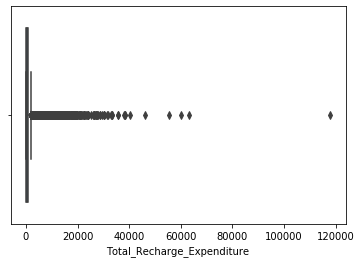

In [52]:
# Checking the spread of the data 
sns.boxplot((telecom_df["Total_Recharge_Expenditure"]))

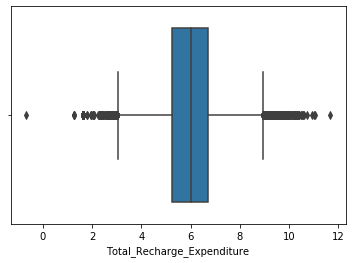

In [53]:
sns.boxplot(np.log(telecom_df["Total_Recharge_Expenditure"]))

In [54]:
HVC_DF = telecom_df.loc[telecom_df["Total_Recharge_Expenditure"]>=telecom_df["Total_Recharge_Expenditure"].quantile(.70)]
HVC_DF.shape

(30014, 188)

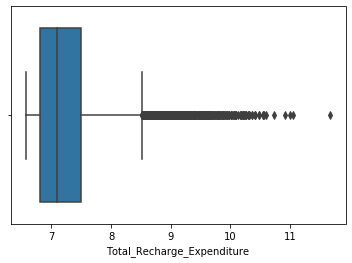

In [55]:
sns.boxplot(np.log(HVC_DF["Total_Recharge_Expenditure"]))

### Defining Chrun 

In [56]:
# deriving a column of 9 month data by using total usage for data and for calling 
HVC_DF["Total_Usage_9"] = HVC_DF['vol_2g_mb_9']+HVC_DF['vol_3g_mb_9']+HVC_DF['total_og_mou_9']+HVC_DF['total_ic_mou_9']


In [57]:
# deriving churn/Target variable defined 1 as churn and 0 as not churn 
HVC_DF.loc[HVC_DF["Total_Usage_9"]>0,"Churn"] = 0
HVC_DF.loc[HVC_DF["Total_Usage_9"]==0,"Churn"]= 1
HVC_DF["Churn"] = HVC_DF["Churn"].astype(int)
HVC_DF.head()

mobile_number  circle_id    arpu_6    arpu_7    arpu_8   arpu_9  \
0      7000842753        109   197.385   214.816   213.803   21.100   
7      7000701601        109  1069.180  1349.850  3171.480  500.000   
8      7001524846        109   378.721   492.223   137.362  166.787   
16     7000875565        109   430.975   299.869   187.894  206.490   
17     7000187447        109   690.008    18.980    25.499  257.583   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0         33.39        31.24         0.00        26.94         94.48   
7         57.84        54.68        52.29        26.94        453.43   
8        413.69       351.03        35.08        33.46         94.66   
16        50.51        74.01        70.61        31.34        296.29   
17      1185.91         9.28         7.79       558.51         61.64   

    offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          89.51          0.00         81.31           0.00           0.00   
7         567.16        325.91         81.31          16.23          33.49   
8          80.63        136.48        108.71           0.00           0.00   
16        229.74        162.76        224.39           0.00           2.83   
17          0.00          5.54         87.89           0.00           4.76   

    roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00            0.0           0.00           0.00           0.00   
7           31.64            0.0          23.74          12.59          38.06   
8            0.00            0.0           0.00           0.00           0.00   
16           0.00            0.0           0.00          17.74           0.00   
17           4.81            0.0           0.00           8.46          13.34   

    roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            0.00             11.53             11.14              0.00   
7            0.00             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
16           0.00             42.61             65.16             67.38   
17          17.98             38.99              0.00              0.00   

    loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              10.03             40.14             39.29              0.00   
7              10.03            308.63            447.38            162.28   
8              26.13             80.96             70.58             50.54   
16             26.88            273.29            145.99            128.28   
17             36.41             58.54              0.00              0.00   

    loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              35.83              0.00              0.00              0.00   
7              35.83             62.13             55.14             53.23   
8              34.58              0.00              0.00              0.00   
16            201.49              0.00              4.48             10.26   
17              9.38              0.00              0.00              0.00   

    loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7               0.00               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
16              4.66               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0                0.0         63.65         61.93          0.00         56.86   
7                0.0        422.16        533.91        255.79         56.86   
8                0.0        378.09        288.18         63.04         60.71   
16        

In [58]:
# identifing the churn percentage
print("Percentage of churn among all High value customers is {}".format(100*HVC_DF["Churn"].sum()/len(HVC_DF["Churn"])))

Percentage of churn among all High value customers is 8.802558805890584


In [59]:
"""
 --> We have very low churn % value so the data is highly imbalanced
 --> Also as we have derieved the churn data we wont need the 9month data so dropping those columns 
 --> We can use total usage as feature for 6 7 and 8 month as well so we will drop the initial features as well 
 --> Lets Do some EDA to Draw some useful Insigts 
"""
HVC_DF=HVC_DF[HVC_DF.columns[~HVC_DF.columns.str.contains('9')]]
# Deriving features 
HVC_DF["Total_Usage_6"] = HVC_DF['vol_2g_mb_8']+HVC_DF['vol_3g_mb_6']+HVC_DF['total_og_mou_6']+HVC_DF['total_ic_mou_6']
HVC_DF["Total_Usage_7"] = HVC_DF['vol_2g_mb_7']+HVC_DF['vol_3g_mb_7']+HVC_DF['total_og_mou_7']+HVC_DF['total_ic_mou_7']
HVC_DF["Total_Usage_8"] = HVC_DF['vol_2g_mb_8']+HVC_DF['vol_3g_mb_8']+HVC_DF['total_og_mou_8']+HVC_DF['total_ic_mou_8']


In [60]:
drp=['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
'total_og_mou_6','total_og_mou_7','total_og_mou_8',
'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
HVC_DF.drop(drp,axis=1 ,inplace=True)

In [61]:
HVC_DF.shape

(30014, 135)

### EDA - Univariate and Bivariate anaysis wrt target variable 
 * As we have churn Value defined ,we did some BiVariate analysis 

<Figure size 960x960 with 0 Axes>

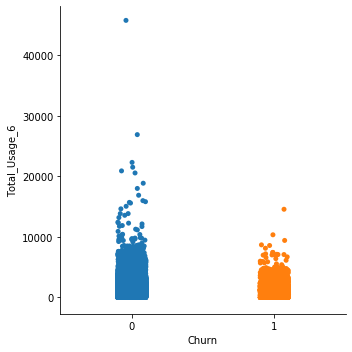

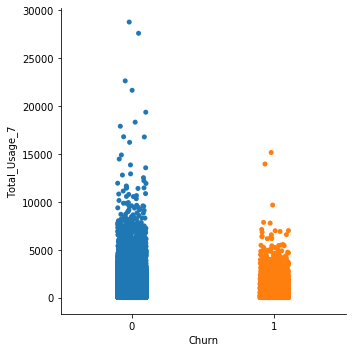

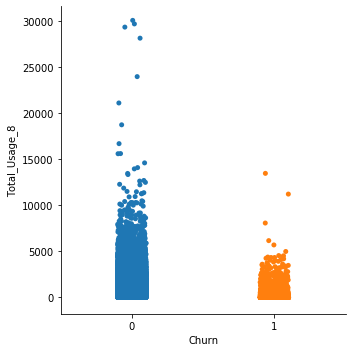

In [62]:
total_usg_list=HVC_DF.columns[HVC_DF.columns.str.contains('Total_Usage')]
plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='w', edgecolor='k')
for i in total_usg_list:
    sns.catplot(x="Churn",y=i, data=HVC_DF);

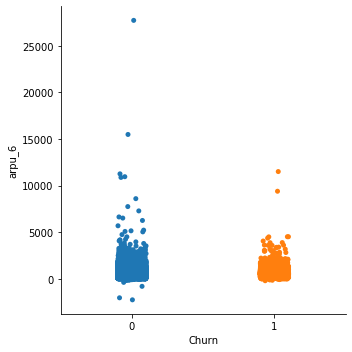

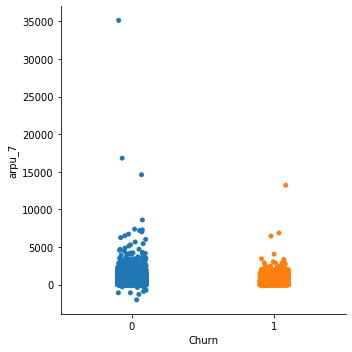

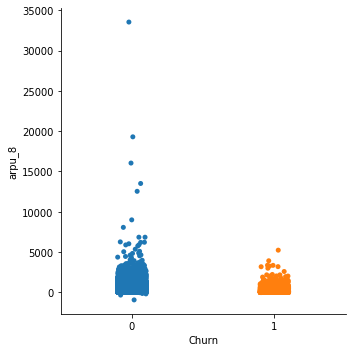

In [63]:
arpu_list=HVC_DF.columns[HVC_DF.columns.str.contains('arpu')]
for i in arpu_list:
    sns.catplot(x="Churn",y=i, data=HVC_DF)

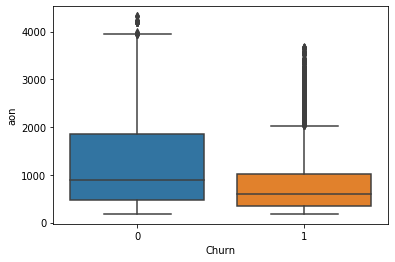

In [64]:
# Checking the spread of " Age on NetworK "
 
sns.boxplot(y='aon',x="Churn",data=HVC_DF)

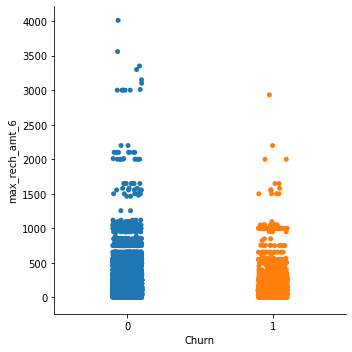

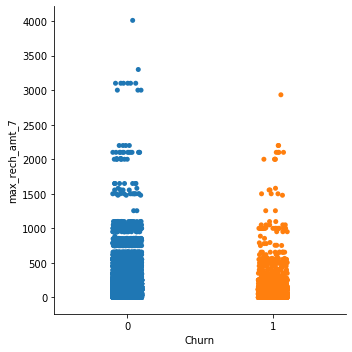

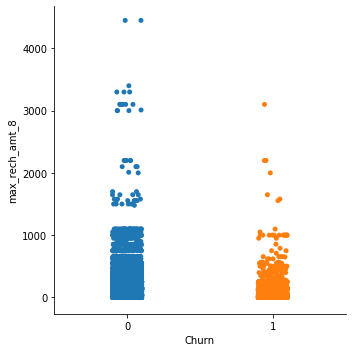

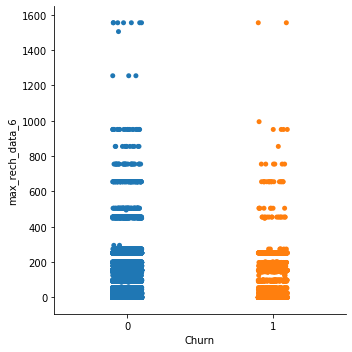

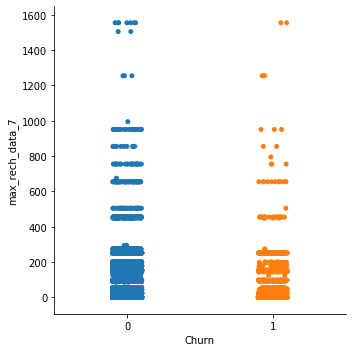

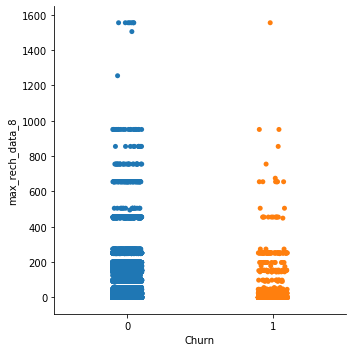

In [65]:
max_list=HVC_DF.columns[HVC_DF.columns.str.contains('max')]
for i in max_list:
    sns.catplot(x="Churn",y=i, data=HVC_DF)

### Outlier Treatment 


In [66]:
"""
 -> There are some Outliers in the upper part but we are not removing them as 
    they are generating higher revenue and they are most critical for the business 
"""

HVC_DF.describe([.01,.001,.25,.5,.75,.99,.999])


mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   3.001400e+04    30014.0  30014.000000  30014.000000  30014.000000   
mean    7.001205e+09      109.0    571.268549    546.020545    498.277119   
std     6.903109e+05        0.0    454.262152    484.752186    502.518042   
min     7.000000e+09      109.0  -2258.709000  -2014.045000   -945.808000   
0.1%    7.000002e+09      109.0     -0.247790     -5.000000     -5.000000   
1%      7.000026e+09      109.0     28.223370      0.000000      0.000000   
25%     7.000611e+09      109.0    332.346000    288.672750    218.804000   
50%     7.001201e+09      109.0    494.964500    464.564500    417.274500   
75%     7.001800e+09      109.0    703.557000    687.919000    652.011500   
99%     7.002386e+09      109.0   1984.860850   1999.336850   1976.251850   
99.9%   7.002409e+09      109.0   3884.553426   4114.875966   3975.582322   
max     7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30014.000000  30014.000000  30014.000000  30014.000000  30014.000000   
mean     268.834527    259.711699    227.850343    383.662626    368.325793   
std      463.302048    474.187412    451.561014    482.528261    492.126609   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0.1%       0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
25%       21.450000     17.830000     12.945000     85.640000     73.015000   
50%       89.535000     78.785000     62.060000    232.710000    209.920000   
75%      303.527500    278.402500    230.120000    499.365000    477.385000   
99%     2161.400000   2189.891100   2128.836100   2325.611900   2371.732000   
99.9%   4135.884220   4420.332400   4252.911450   4175.586640   4544.594380   
max     7376.710000   8157.780000  10752.560000   8362.360000   9667.130000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  30014.000000   30014.000000   30014.000000   30014.000000   
mean     327.449003      16.358244      12.546866      12.361212   
std      470.925734      78.527795      74.885421      73.627188   
min        0.000000       0.000000       0.000000       0.000000   
0.1%       0.000000       0.000000       0.000000       0.000000   
1%         0.000000       0.000000       0.000000       0.000000   
25%       54.165000       0.000000       0.000000       0.000000   
50%      173.925000       0.000000       0.000000       0.000000   
75%      427.737500       0.000000       0.000000       0.000000   
99%     2119.803400     342.341200     276.143200     283.094800   
99.9%   4433.117600     976.324700    1022.343730     887.315000   
max    14007.340000    2613.310000    3813.290000    4169.810000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   30014.000000   30014.000000   30014.000000      30014.000000   
mean       27.243133      19.951977      19.644514         86.216356   
std       117.352250      95.314757     104.057230        231.712139   
min         0.000000       0.000000       0.000000          0.000000   
0.1%        0.000000       0.000000       0.000000          0.000000   
1%          0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          5.610000   
50%         0.000000       0.000000       0.000000         25.510000   
75%         0.000000       0.000000       0.000000         79.487500   
99%       543.355900     430.024100     424.804100       1024.674400   
99.9%    1458.713460    1244.626220    1360.124150       3022.857230   
max      3775.110000    2812.040000    5337.040000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      30014.000000      30014.000000      30014.000000      30014.000

In [67]:
# Dropping unique Key 
HVC_DF.drop(["mobile_number","circle_id"], axis=1, inplace=True)


### Test Train Split 


In [68]:
# splitting the dataset for modeling as X and y
x = HVC_DF
y = x.pop("Churn")

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [69]:
print("Percentage of churn among all High value customers is {}".format(100*y_train.sum()/len(X_train.index)))

Percentage of churn among all High value customers is 8.836072856508219


In [70]:
# Since Our target value is highly imbalced 
# using smote to balance it 
# appling smoth techniques to handle imbalancing 
from imblearn.over_sampling import SMOTE
smt = SMOTE()

X_train,y_train = smt.fit_sample(X_train,y_train)

In [71]:
X_train.shape

(41042, 132)

In [72]:
print("Percentage of churn after upsampling among all HVCs is {}".format(100*y_train.sum()/len(X_train)))

Percentage of churn after upsampling among all HVCs is 50.0


In [73]:
# scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [74]:
# garbage collect (unused) object
gc.collect()

28990

##  Model Building 

    * We will be Building 4 Models 
    * w Model will be Interpretable without PCA (Decision Tree & LR) 
    * 3 Models with PCA as Dimentionality reduction (LR+Hyperparms , RF and XGBoost Classifier )

### Model 1 : Decision Tree (interpreatable)

In [103]:
# Putting features
features = list(x.columns)
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [178]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [179]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      6851
           1       0.41      0.78      0.53       653

    accuracy                           0.88      7504
   macro avg       0.69      0.84      0.73      7504
weighted avg       0.93      0.88      0.90      7504



In [180]:
# Printing confusion matrix and accuracy wit the default parm
print(confusion_matrix(y_test,y_pred_default))
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred_default)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred_default)))

[[6108  743]
 [ 144  509]]
Accuracy 0.8817963752665245
Sensitivity 0.77947932618683


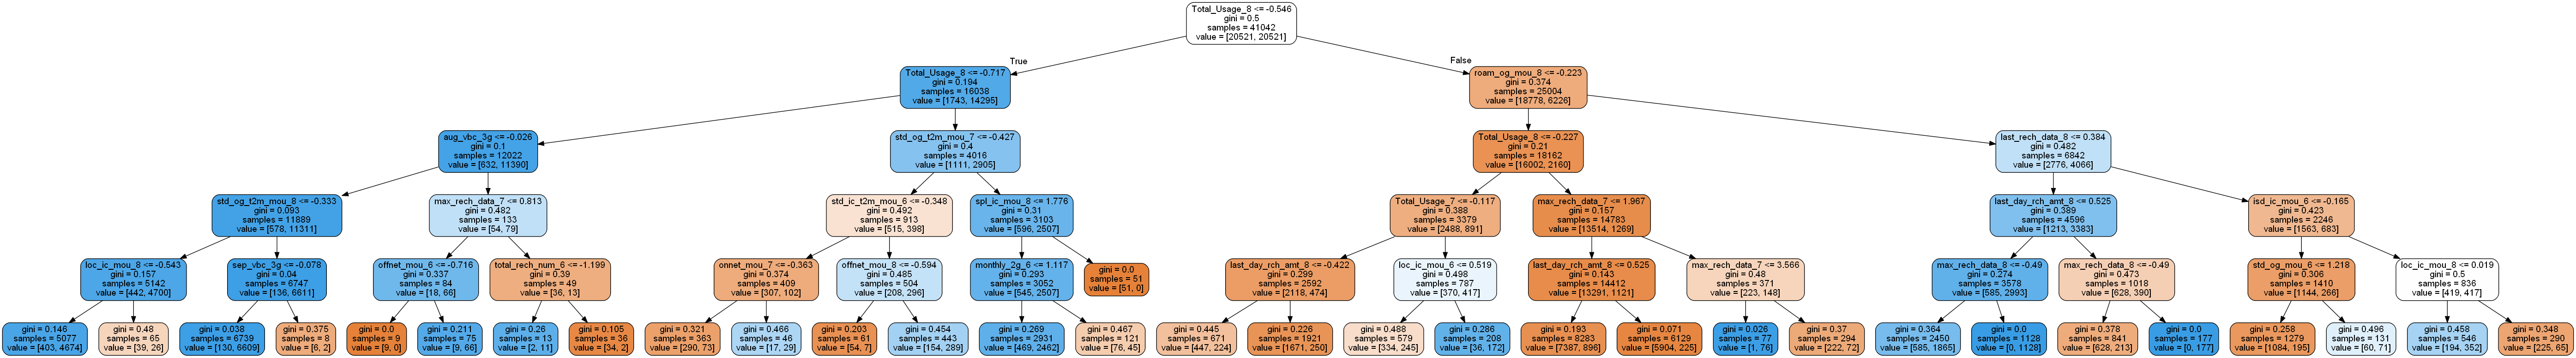

In [107]:
# plotting tree with max_depth=5

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [108]:
graph.write_pdf("Telecom Churn Default1.pdf")

True

In [232]:
##### HyperParameter Tuning To improve the model 
"""
  > We will use Gridsearch CV to test and find the best parameter
  > we will build the DT with the best found Parm 
  > we will use Recall(sensitivity) as the best scoring Parm as our main objective to identify 
    churn (true positives) .


"""
## HyperParameter Tuning To improve the model 
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
DT = DecisionTreeClassifier()

params = {'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}
folds = 5

DT_model = GridSearchCV(estimator = DT, cv = folds, param_grid = params, scoring = "accuracy",
                        return_train_score = True, n_jobs = -1)
DT_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [233]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy ", DT_model.best_score_)
print("Best parm",DT_model.best_params_)
print(DT_model.best_estimator_)

Best accuracy  0.8974470859611365
Best parm {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [234]:
# Testing data in best parameters 
# DT_model_final = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf =  50, min_samples_split = 100)

DT_model_final=DT_model.best_estimator_
DT_model_final.fit(X_train,y_train)

y_pred_default = DT_model_final.predict(X_test)

In [235]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))

print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred_default)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred_default)))

[[6171  680]
 [ 171  482]]
Accuracy 0.88659381663113
Sensitivity 0.7381316998468607


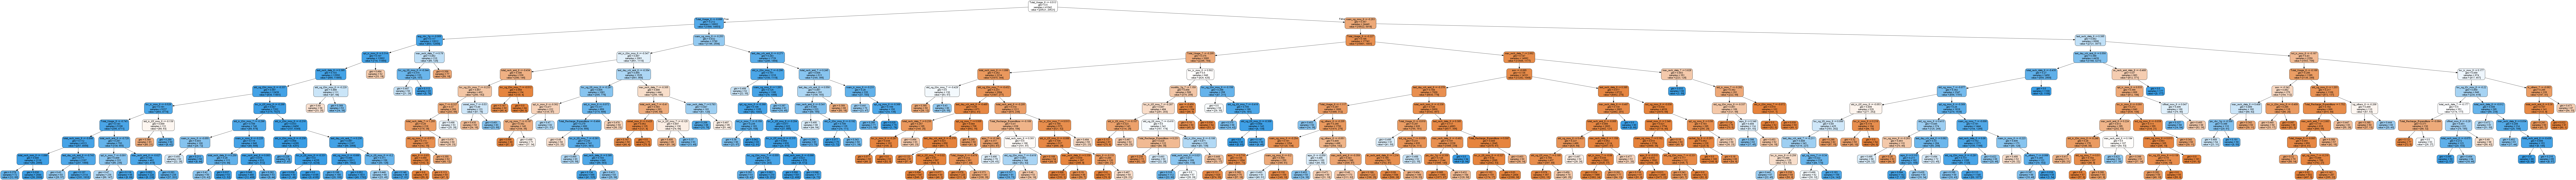

<Figure size 1152x432 with 0 Axes>

In [84]:
plt.figure(figsize=(16,6))
dot_data = StringIO()  
export_graphviz(DT_model_final, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [85]:
graph.write_pdf("Telecom Churn decision Tree with Best Parm .pdf")

True

### Model 2 : LoGistic Regression with HyperParameters 


### PCA for Dimensionality reduction

In [77]:
from sklearn.decomposition import PCA

pca = PCA(random_state = "42")
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state='42',
    svd_solver='auto', tol=0.0, whiten=False)

In [78]:
pca.explained_variance_ratio_

array([1.02599921e-01, 8.66200437e-02, 5.87338231e-02, 4.86733891e-02,
       3.79684385e-02, 3.52114775e-02, 3.18294486e-02, 2.96372186e-02,
       2.71482907e-02, 2.54576208e-02, 2.27476854e-02, 2.03745886e-02,
       2.01486404e-02, 1.90189900e-02, 1.82644764e-02, 1.65613871e-02,
       1.57876135e-02, 1.47841213e-02, 1.47069161e-02, 1.39407881e-02,
       1.36610903e-02, 1.35091285e-02, 1.31414549e-02, 1.19590695e-02,
       1.08112838e-02, 9.61116021e-03, 9.38920055e-03, 9.11665142e-03,
       8.73923883e-03, 8.43531251e-03, 8.04380181e-03, 7.84347528e-03,
       7.68567070e-03, 7.55184598e-03, 7.18413946e-03, 7.09789993e-03,
       6.94304085e-03, 6.69843793e-03, 6.50713287e-03, 6.42080032e-03,
       6.06175345e-03, 5.74787356e-03, 5.39644224e-03, 5.27105204e-03,
       5.18732547e-03, 4.87642231e-03, 4.80962545e-03, 4.45553237e-03,
       4.40043161e-03, 4.26689265e-03, 4.21052093e-03, 4.10052186e-03,
       3.90118356e-03, 3.85478486e-03, 3.71420376e-03, 3.56316596e-03,
      

No handles with labels found to put in legend.


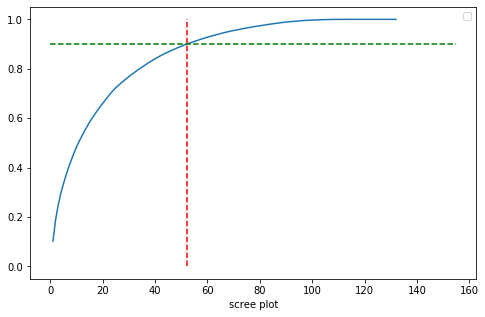

In [79]:
# scree plot to identify the  90% variance ratio
cum = np.cumsum(pca.explained_variance_ratio_)
fig= plt.figure(figsize=(8,5))
plt.plot(range(1,len(cum)+1),cum)
plt.plot([0,155],[0.90,0.90],'g--')
plt.plot([52,52],[0,1.0],'r--')
plt.xlabel('scree plot')
plt.legend()

In [80]:
PCA1 = PCA(n_components = 52, random_state = 42)
PCA1.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=52, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [81]:
pca_x_train = PCA1.fit_transform(X_train)
pca_x_test = PCA1.transform(X_test)

In [91]:
len(pca_x_train)

41042

In [117]:
#### code for modeling in logistic regression with Grid search CV to identify the best model 
# We are checking accuracy score for  both Ridge and Lasso Penalty 

folds = 5
params = {'C': [0, 0.00001, 0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 
                0.01,0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2,3,4,5],
          'penalty' :['l1', 'l2'] }

lr = LogisticRegression()

model = GridSearchCV(estimator = lr, param_grid = params, scoring = "accuracy", cv = folds,return_train_score = True )
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1e-05, 0.0001, 0.001, 0.002, 0.003, 0.004,
                               0.005, 0.006, 0.007, 0.01, 0.0001, 0.001, 0.005,
                               0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [120]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy", model.best_score_)
print("best parm",model.best_params_)
print(model.best_estimator_)

Best accuracy 0.915478426426375
best parm {'C': 5, 'penalty': 'l2'}
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [121]:
# Running the model on the Test data 

lr = model.best_estimator_
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred))
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))



[[6381  470]
 [ 230  423]]
Accuracy 0.9067164179104478
Sensitivity 0.6477794793261868


In [122]:
## extracting columns and coefficients to merge and identify important variables 
cols = x.columns 
for i in lr.coef_:
    print(i)

[ 4.08281545e-01  3.03919038e-01  9.74317423e-02  8.96694371e-01
  2.53662953e+00  5.06705232e+00  1.43504187e+00  5.30248407e-01
  5.80581679e+00  8.02397798e-02  4.26879502e-02 -3.14977246e-02
 -3.98301015e-01 -9.26145151e-02 -1.55237787e+00 -6.84519545e-01
 -1.10178117e+00 -2.95451247e+00 -8.47362244e-01 -5.29646612e-01
 -3.31415605e+00 -7.16190860e-02 -2.93643728e-01 -1.45592999e-01
 -1.14273231e-01 -1.77340400e-02  1.78887072e-01  1.99084837e-01
  6.29107647e-01  5.66477466e-01 -4.14720133e-01 -1.88858882e+00
 -2.66113328e+00 -8.69302847e-01  1.75641831e-01 -3.25153343e+00
 -4.57927311e-02  4.45893808e-02 -1.22467933e-01 -5.58196636e-01
 -6.23164971e-01 -2.50004666e+00 -1.33495970e-01 -3.18035455e-02
 -6.25316347e-01  1.69065874e-02  8.95755428e-03 -4.70330666e-01
 -1.44710021e-02  1.37897965e-02  1.50930137e-01 -5.69212502e-01
 -7.82686260e-01 -2.77250933e+00 -6.01997714e-01 -1.28484168e+00
 -3.72755397e+00 -1.09815109e-01 -2.85282035e-01 -9.38150635e-01
  1.28293165e+00  1.89682

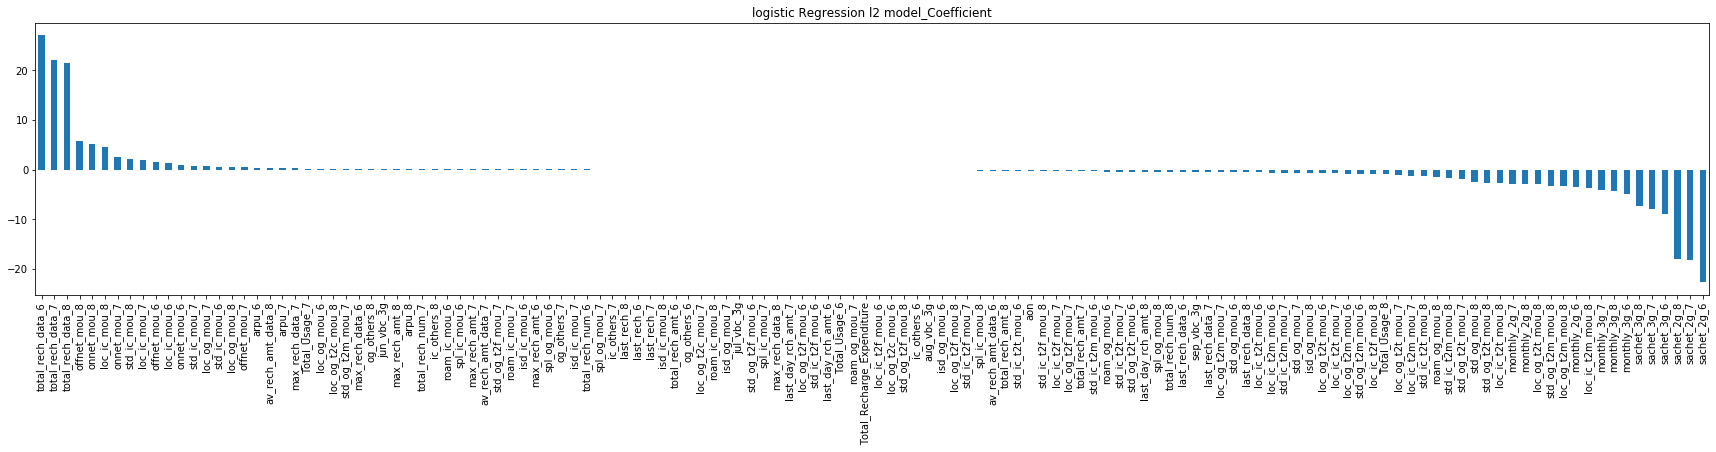

In [123]:
# code for merging the cofficient and identifing important variables 
coef = pd.Series(data = i, index = cols).sort_values(ascending = False)

plt.figure(figsize= (30,5))
coef.plot(kind = "bar",title = "logistic Regression l2 model_Coefficient") 
plt.show()


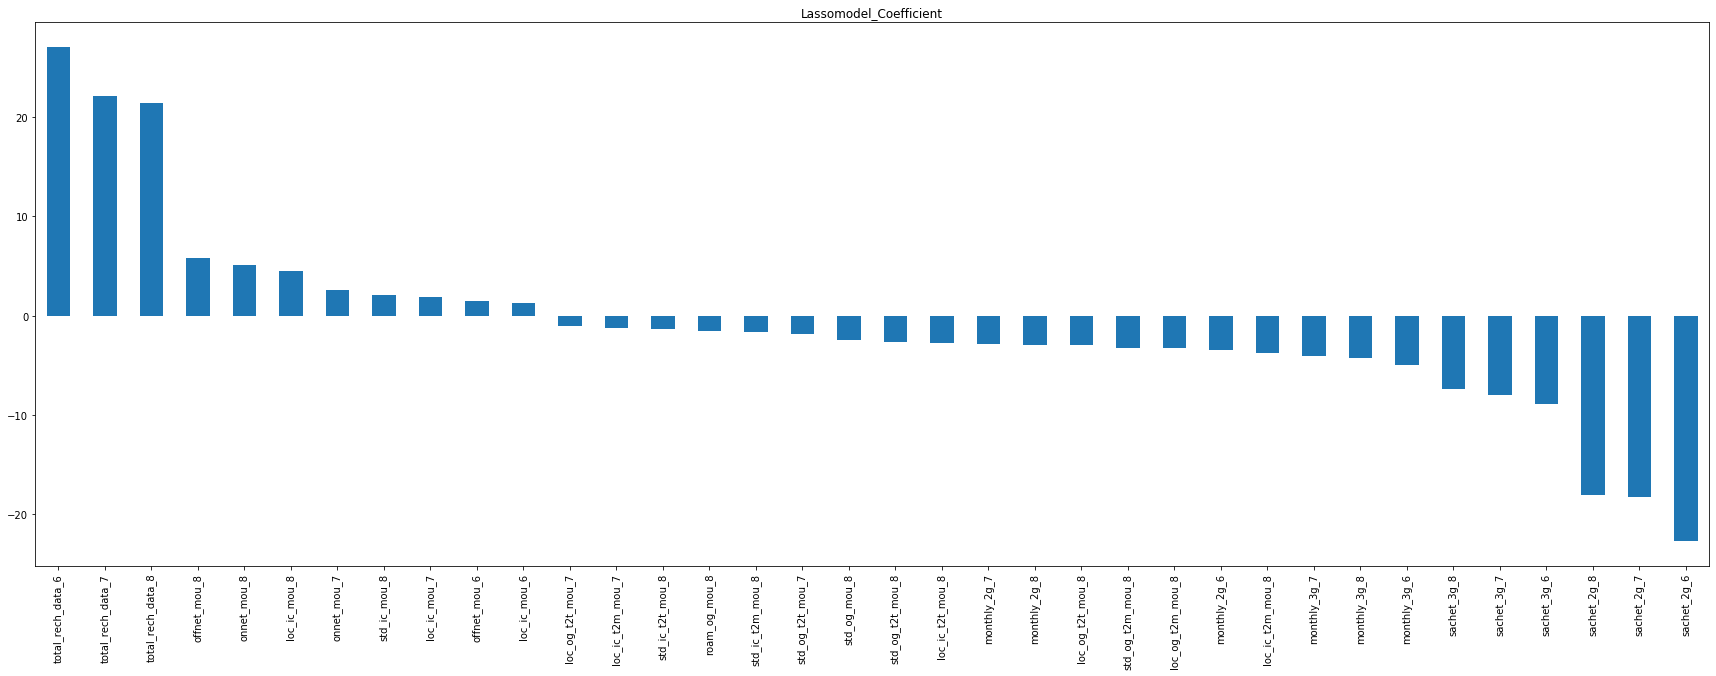

In [141]:
# Plotting most infuential Features 

plt.figure(figsize= (30,10))
coef1=coef[(coef >1) | (coef < -1)]
coef1.plot(kind = "bar",title = "Lassomodel_Coefficient") 
plt.show()

In [156]:
coef1

total_rech_data_6    27.054781
total_rech_data_7    22.103914
total_rech_data_8    21.453605
offnet_mou_8          5.805817
onnet_mou_8           5.067052
loc_ic_mou_8          4.511829
onnet_mou_7           2.536630
std_ic_mou_8          2.064309
loc_ic_mou_7          1.896823
offnet_mou_6          1.435042
loc_ic_mou_6          1.282932
loc_og_t2t_mou_7     -1.101781
loc_ic_t2m_mou_7     -1.284842
std_ic_t2t_mou_8     -1.336523
roam_og_mou_8        -1.552378
std_ic_t2m_mou_8     -1.697350
std_og_t2t_mou_7     -1.888589
std_og_mou_8         -2.500047
std_og_t2t_mou_8     -2.661133
loc_ic_t2t_mou_8     -2.772509
monthly_2g_7         -2.821636
monthly_2g_8         -2.952378
loc_og_t2t_mou_8     -2.954512
std_og_t2m_mou_8     -3.251533
loc_og_t2m_mou_8     -3.314156
monthly_2g_6         -3.428236
loc_ic_t2m_mou_8     -3.727554
monthly_3g_7         -4.088815
monthly_3g_8         -4.307870
monthly_3g_6         -5.024661
sachet_3g_8          -7.438701
sachet_3g_7          -8.010640
sachet_3

In [142]:
# Building the Same LR model with PC Features  

# code for modeling in logistic regression with Grid search CV to identify the best model 
# We are checking accuracy score for  both Ridge and Lasso Penalty 

folds = 5
params = {'C': [0, 0.00001, 0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 
                0.01,0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2,3,4,5],
          'penalty' :['l1', 'l2'] }

lr = LogisticRegression()

model = GridSearchCV(estimator = lr, param_grid = params, scoring = "accuracy", cv = folds, n_jobs= -1  )
model.fit(pca_x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0, 1e-05, 0.0001, 0.001, 0.002, 0.003, 0.004,
                               0.005, 0.006, 0.007, 0.01, 0.0001, 0.001, 0.005,
                               0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False

In [143]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy", model.best_score_)
print("best parm",model.best_params_)
print("Best Model  ",model.best_estimator_)

Best accuracy 0.8440139275653571
Best Model   LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [144]:
# Building The LR model with the Best Hyperparameters 

pca_lr = model.best_estimator_

pca_lr.fit(pca_x_train, y_train)


y_pred = pca_lr.predict(pca_x_test)

In [145]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred))

print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

[[5664 1187]
 [ 124  529]]
Accuracy 0.8252931769722814
Sensitivity 0.8101071975497703


### Model 3 : Random Forest Classifier with PCA


In [146]:
## We are using Gridserach CV to check accuracy accross below combination and we will be building  our final model on the best found parm
## we will be checking performance on maxdept 4 8 and 10 and estimators of 100 , 200 & 300 

params = {'max_depth': [4,8,10],
    'n_estimators': [100,200, 300]}
folds = 5
RF = RandomForestClassifier()

RF_model = GridSearchCV(estimator = RF, param_grid= params, cv = folds, return_train_score  = True, scoring = "accuracy", n_jobs = -1)
RF_model.fit(pca_x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [186]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy", RF_model.best_score_)
print("Best parm",RF_model.best_params_)
print(RF_model.best_estimator_)

Best accuracy 0.8905027691520052
Best parm {'max_depth': 10, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [187]:
forest = RF_model.best_estimator_
forest.fit(pca_x_train, y_train)

y_pred_fst = forest.predict(pca_x_test)


In [188]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_fst))

print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred_fst)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred_fst)))

[[6092  759]
 [ 185  468]]
Accuracy 0.8742004264392325
Sensitivity 0.7166921898928025


### Model 4 : Extreme Gradient Boost Classifier 

In [203]:
## Building with Random Parameters to check the performance 
boost = XGBClassifier(max_depth=5,n_estimators=600,learning_rate=0.2)
boost.fit(pca_x_train, y_train)
y_pred_a = boost.predict(pca_x_test)

In [204]:
# Printing confusion matrix and accuracy with the XGB default parameters 

print(confusion_matrix(y_test,y_pred_a))

print("Accuracy {}".format(metrics.accuracy_score(y_test,y_pred_a)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred_a)))

[[6429  422]
 [ 275  378]]
Accuracy 0.9071162046908315
Sensitivity 0.5788667687595712


In [154]:
## We will use Grid Search CV to find the best combination of hyperparameters 
# hyperparameter tuning with XGBoost
# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
              'subsample': [0.3, 0.6, 0.9],
              'max_depth': [4,6,8],
              'n_estimators': [100,200, 300]}
                       
# specify model
xgb_model = XGBClassifier()
# set up GridSearchCV()
model_xgbc = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  
# fit the model
model_xgbc.fit(pca_x_train,y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 58.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.

In [158]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy", model_xgbc.best_score_)
print("Best parm",model_xgbc.best_params_)
print(model_xgbc.best_estimator_)

Best accuracy 0.9510259387067023
Best parm {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.9}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [208]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 8, 
          'n_estimators':300,
          'subsample': 0.9,
          'n_jobs':1
         }

# fit model on training data
model = XGBClassifier(params = params)
model.fit(pca_x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 300,
                      'n_jobs': 1, 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [209]:
# predict
y_pred_xg = model.predict(pca_x_test)

In [210]:
# Printing confusion matrix and accuracy with the XGB default parameters 

print(confusion_matrix(y_test,y_pred_xg))

print("accuracy {}".format(metrics.accuracy_score(y_test, y_pred_xg)))
print("sensitivity {}".format(metrics.recall_score(y_test,y_pred_xg)))

[[5948  903]
 [ 155  498]]
accuracy 0.8590085287846482
sensitivity 0.7626339969372129


## Conclusion & Reccomendation 

- After Data Preprocessing and Feature Enggineering we have build in total of 5 ML models 
- Out of the 5 models 2 models are built on the original data for interpreatability 
- We build and hypertuned models with scoring accuracy and Recall . Though our data is more sensitive (TP should be indentified) we   observed that keeping the scoring as accuracy gives better result on the unseen data . Most probably due train data have more synthesized data 
  models with best recall and lower accuracy didnt perform well on real data 
- So all our models are evaluated and hypertuned based on accuracy  
  
- I have mentioed the Details of the Models that we build below 
 

### ```Decision Tree Model``` 

- <b> Best Hyperparameters for the Decision Tree Model came out to be 
    
 *   'max_depth': 6
 *   'min_samples_leaf': 50
 *   'min_samples_split': 50 and 
 *   'criterion': Gini 
 
- <b> At these Hyperparameters 
   
   * Accuracy of Prediction Test Data : 88%
   * Sensitivity Of Prediction Test Data : 73%
    
    


![](https://i.ibb.co/2kyMxnR/DT.png)

    
    
### ```Logistic Regression Model ``` 

####  Without PCA 
    
- <b> Best Hyperparameters for the Logistic Regression Model came out to be 
 *   Alpha : 5
 *   Penalty : L2,Lasso 
 
- <b> Top Coefficents as per LR model are 
    
 
    
![](https://i.ibb.co/2kj4kHn/LR.png)

    
<b>Top 10 Identifiers   
    
    
    Features              Coef Value         Desc 
    total_rech_data_6    27.054781           Total Recharge in June
    total_rech_data_7    22.103914           Total Recharge in July
    total_rech_data_8    21.453605           Total Recharge in Aug
    offnet_mou_8          5.805817           All kind of calls outside the operator in Aug
    onnet_mou_8           5.067052           All kind of calls inside the operator in Aug   
    monthly_3g_6         -5.024661           used 3G Service schemes with validity equivalent to a month in June 
    sachet_3g_8          -7.438701           used 3G Service schemes with validity lesser to a month in Aug
    sachet_3g_7          -8.010640           used 3G Service schemes with validity lesser to a month in July
    sachet_3g_6          -8.899074           used 3G Service schemes with validity lesser to a month in June
    sachet_2g_8         -18.042866           used 2G Service schemes with validity lesser to a month in Aug
    sachet_2g_7         -18.245165           used 2G Service schemes with validity lesser to a month in July
    sachet_2g_6         -22.718023           used 2G Service schemes with validity lesser to a month in June
 
- <b> At these Hyperparameters 

 
   * Accuracy of Prediction : 90.67 %
   * Sensitivity Of Prediction : 65 %

####  After Using PCA 
    
- <b> Best Hyperparameters for the Logistic Regression Model with came out to be 
 *   Alpha : 0.4
 *   Penalty : L2,Lasso 
   
  
- <b> At these Hyperparameters 

 
   * Accuracy of Prediction on Test Data : 82 %
   * Sensitivity Of Prediction on Test Data  : 81 %
    
  
  
### ```Random Forest Ensemble ``` 

- <b> Best Hyperparameters for the Random Forest Model came out to be 
 *   'max_depth': 10
 *   'n_estimatore':100 
 
- <b> At these Hyperparameters 
   
   * Accuracy of Prediction on Test Data :  87
   * Sensitivity Of Prediction on Test Data  : 71 
 
  
### ```Extreme Gradient Boost Classifier ``` 

- <b> Best Hyperparameters for the Random Forest Model came out to be 
		-	  'learning_rate': 0.2 
        -      'subsample': 0.9
        -      'max_depth': 8
        -      'n_estimators': 300 

- <b> At these Hyperparameters 
   
   * Accuracy of Prediction on Test Data : 85%
   * Sensitivity Of Prediction on Test Data: 76%



## Model Comparison  :

* For the heavy models like XGboost & Random Forest we got best accuracy scores (90%+) while doing Cross Validation 
  But some how on the unseen data(x_test) they performed not that good and produced generic results 
* Considering Our data is highly imbalance sensitivity of 70% is good enough . 
* Based on performance metrics on the unseen test data simple Logistic Regression with Lasso regularization produced the best result in terms of Sensitivity 81% 
* In terms of overall accuracy the XG boost model produced the best result (85%)



* Based on the interpreatable Models we found that the significant Churn predictors are 
  Total usage on July and Sept . If the operator notices lesser usage on these month they should start taking care of these customers on a priortiy 

    
   